In [3]:
import pandas as pd
import numpy as np
import scanpy as sc

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

# Select Male Samples

In [3]:
adata = sc.read_h5ad('scRNAseq_pancan_normalized_after_scanvi.h5ad')
adata

AnnData object with n_obs × n_vars = 1030968 × 14090
    obs: 'SampleID', 'DataID', 'Age', 'Sex', 'Treatment', 'Organ', 'Cancertype', 'tissue_type', 'DataSampleID', 'celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'batch', '_scvi_batch', '_scvi_labels', 'Celltype1', 'Celltype2', 'Celltype3', 'Cancertype_TCGA', 'RL_Prediction_Only9genes', 'LOY'
    var: 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'Cancertype_TCGA_colors', 'Cancertype_colors', 'Celltype1_colors', 'Celltype2_colors', 'Celltype3_colors', 'DataID_colors', 'Organ_colors', 'Sex_colors', '_scvi_manager_uuid', '_scvi_uuid', 'celltype_colors', 'hvg', 'neighbors', 'rank_genes_groups', 'umap'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

In [5]:
MALE = adata[adata.obs['Sex']=='Male',:].copy()
MALE

AnnData object with n_obs × n_vars = 497055 × 14090
    obs: 'SampleID', 'DataID', 'Age', 'Sex', 'Treatment', 'Organ', 'Cancertype', 'tissue_type', 'DataSampleID', 'celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'batch', '_scvi_batch', '_scvi_labels', 'Celltype1', 'Celltype2', 'Celltype3', 'Cancertype_TCGA', 'RL_Prediction_Only9genes', 'LOY'
    var: 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'Cancertype_colors', 'Celltype1_colors', 'Celltype2_colors', 'DataID_colors', 'Organ_colors', 'Sex_colors', '_scvi_manager_uuid', '_scvi_uuid', 'celltype_colors', 'hvg', 'neighbors', 'rank_genes_groups', 'umap'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

# SCVI for male samples

In [18]:
import scvi

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (


In [20]:
sc.pp.highly_variable_genes(MALE, flavor = 'seurat_v3', n_top_genes=2000, #layer = "counts", 
                            subset = False, inplace=True)

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:61: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [30]:
scvi.model.SCVI.setup_anndata(MALE, batch_key='DataSampleID')#layer = 'counts',
vae = scvi.model.SCVI(MALE,n_latent=9)

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)


In [31]:
vae.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 1/16:   0%|          | 0/16 [00:00<?, ?it/s]

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 2/16:   6%|▋         | 1/16 [02:27<36:50, 147.37s/it, v_num=1, train_loss_step=4.29e+3, train_loss_epoch=4.3e+3]

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 3/16:  12%|█▎        | 2/16 [04:50<33:44, 144.62s/it, v_num=1, train_loss_step=4.12e+3, train_loss_epoch=4.14e+3]

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 4/16:  19%|█▉        | 3/16 [07:13<31:14, 144.23s/it, v_num=1, train_loss_step=4.15e+3, train_loss_epoch=4.11e+3]

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 5/16:  25%|██▌       | 4/16 [09:37<28:46, 143.87s/it, v_num=1, train_loss_step=4.12e+3, train_loss_epoch=4.1e+3] 

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 6/16:  31%|███▏      | 5/16 [12:00<26:21, 143.78s/it, v_num=1, train_loss_step=4.02e+3, train_loss_epoch=4.1e+3]

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 7/16:  38%|███▊      | 6/16 [14:21<23:48, 142.81s/it, v_num=1, train_loss_step=4.09e+3, train_loss_epoch=4.09e+3]

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 8/16:  44%|████▍     | 7/16 [16:42<21:20, 142.25s/it, v_num=1, train_loss_step=4.13e+3, train_loss_epoch=4.09e+3]

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 9/16:  50%|█████     | 8/16 [19:06<19:02, 142.84s/it, v_num=1, train_loss_step=4.19e+3, train_loss_epoch=4.09e+3]

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 10/16:  56%|█████▋    | 9/16 [21:29<16:39, 142.84s/it, v_num=1, train_loss_step=4.05e+3, train_loss_epoch=4.09e+3]

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 11/16:  62%|██████▎   | 10/16 [23:51<14:14, 142.40s/it, v_num=1, train_loss_step=4.27e+3, train_loss_epoch=4.09e+3]

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 12/16:  69%|██████▉   | 11/16 [26:14<11:52, 142.58s/it, v_num=1, train_loss_step=3.94e+3, train_loss_epoch=4.09e+3]

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 13/16:  75%|███████▌  | 12/16 [28:36<09:30, 142.54s/it, v_num=1, train_loss_step=4.01e+3, train_loss_epoch=4.09e+3]

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 14/16:  81%|████████▏ | 13/16 [31:00<07:08, 142.93s/it, v_num=1, train_loss_step=3.98e+3, train_loss_epoch=4.08e+3]

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 15/16:  88%|████████▊ | 14/16 [33:24<04:46, 143.31s/it, v_num=1, train_loss_step=4.04e+3, train_loss_epoch=4.08e+3]

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 16/16:  94%|█████████▍| 15/16 [35:48<02:23, 143.44s/it, v_num=1, train_loss_step=4.11e+3, train_loss_epoch=4.08e+3]

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 16/16: 100%|██████████| 16/16 [38:11<00:00, 143.47s/it, v_num=1, train_loss_step=4.23e+3, train_loss_epoch=4.08e+3]

`Trainer.fit` stopped: `max_epochs=16` reached.


Epoch 16/16: 100%|██████████| 16/16 [38:11<00:00, 143.24s/it, v_num=1, train_loss_step=4.23e+3, train_loss_epoch=4.08e+3]


In [32]:
SCVI_LATENT_KEY = "X_scVI"
MALE.obsm[SCVI_LATENT_KEY] = vae.get_latent_representation(MALE)

In [33]:
sc.pp.neighbors(MALE, use_rep = SCVI_LATENT_KEY)
sc.tl.umap(MALE)
MALE.write_h5ad('scRNAseq_pancan_MALE_after_SCVI.h5ad',compression='gzip')

# UMAPS for cell type and cancer type

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


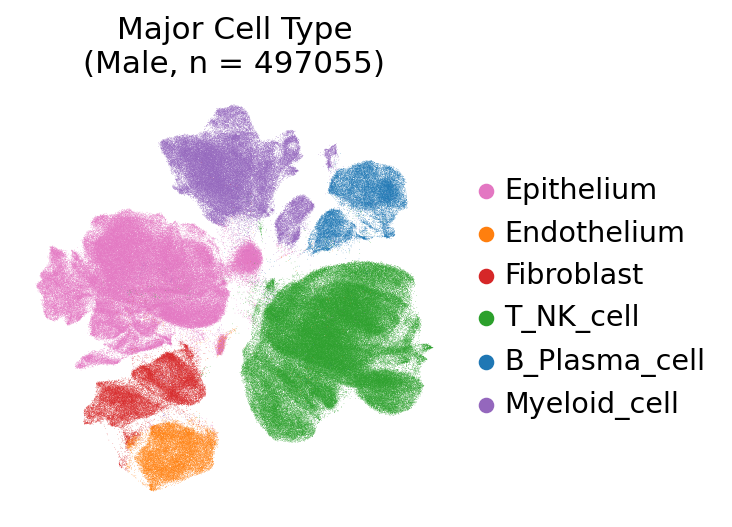

In [36]:
#Fig 3a cell type
Celltype1_cmap = {
    'B_Plasma_cell':'#1F77B4',
    'Endothelium':'#FF7F0E',
    'Epithelium': '#E377C2',
    'Fibroblast':'#D62728',
    'Myeloid_cell':'#9467BD',
    'T_NK_cell':'#2CA02C',
}
sc.set_figure_params(figsize=(3.5, 3.5))
sc.pl.umap(
    MALE,
    color=["Celltype1"],
    palette=Celltype1_cmap,
    frameon=False,
    ncols=1,
    title=f'Major Cell Type\n(Male, n = {MALE.obs.shape[0]})',
    save='Fig3b_Celltype_UMAP_Male.pdf'
)

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


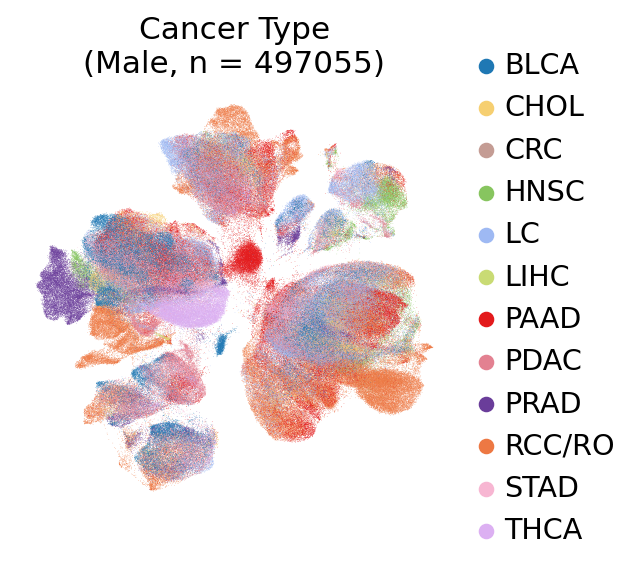

In [37]:
#Fig 3a cancer type
sc.set_figure_params(figsize=(3.5, 3.5))
sc.pl.umap(
    MALE,
    color=['Cancertype_TCGA'],
    palette = {
      'BLCA': '#1f78b4',
      'CHOL': '#F6CF71',
      'CRC': '#C49C94',
      'THCA': '#DCB0F2',
      'HNSC': '#87C55F',
      'LC': '#9EB9F3',
      'LIHC': '#C9DB74',
      'PAAD':  '#e31a1c',
      'PDAC': "#E38191",
      'PRAD': '#6a3d9a',
      'RCC/RO': '#ed7843',
      'STAD': '#F7B6D2',
    },
    frameon=False,
    ncols=1,
    title=f'Cancer Type\n(Male, n = {MALE.obs.shape[0]})',
    save='Fig3b_Cancertype_UMAP_Male.pdf'
)

# LOY prediction model check

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


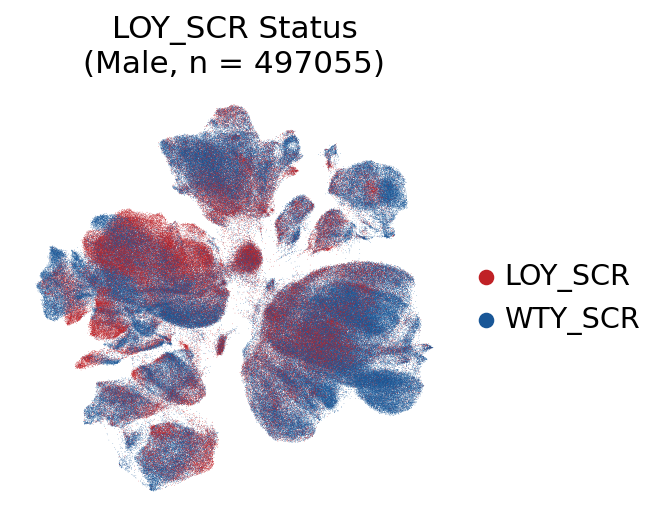

In [38]:
#Fig 3b
LOY_colors = {'LOY_SCR':'#C02126', 'WTY_SCR':'#195797'}
sc.set_figure_params(figsize=(3.5, 3.5))
sc.pl.umap(
    MALE,
    color=["LOY"],
    frameon=False,
    palette=LOY_colors,
    ncols=1,
    title=f'LOY_SCR Status\n(Male, n = {MALE.obs.shape[0]})',
    save='Fig3b_LOY_UMAP_male.pdf'
)

In [39]:
#Fig 3e
MALE.obs['LOY'] = MALE.obs['LOY'].astype(str)
MALE.obs['Celltype1'] = MALE.obs['Celltype1'].astype(str)
MALE.obs['LOY_celltype1'] = MALE.obs['LOY'] + '_' + MALE.obs['Celltype1']
MALE.obs['LOY_celltype1'].value_counts()

LOY_celltype1
WTY_SCR_T_NK_cell        144624
WTY_SCR_Epithelium        83453
LOY_SCR_Epithelium        73576
WTY_SCR_Myeloid_cell      51406
LOY_SCR_T_NK_cell         40675
LOY_SCR_Myeloid_cell      23292
WTY_SCR_Fibroblast        21172
WTY_SCR_B_Plasma_cell     20064
WTY_SCR_Endothelium       14933
LOY_SCR_Fibroblast         9950
LOY_SCR_Endothelium        7975
LOY_SCR_B_Plasma_cell      5935
Name: count, dtype: int64

/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/sheny2/anaconda3/envs/multiome_env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored

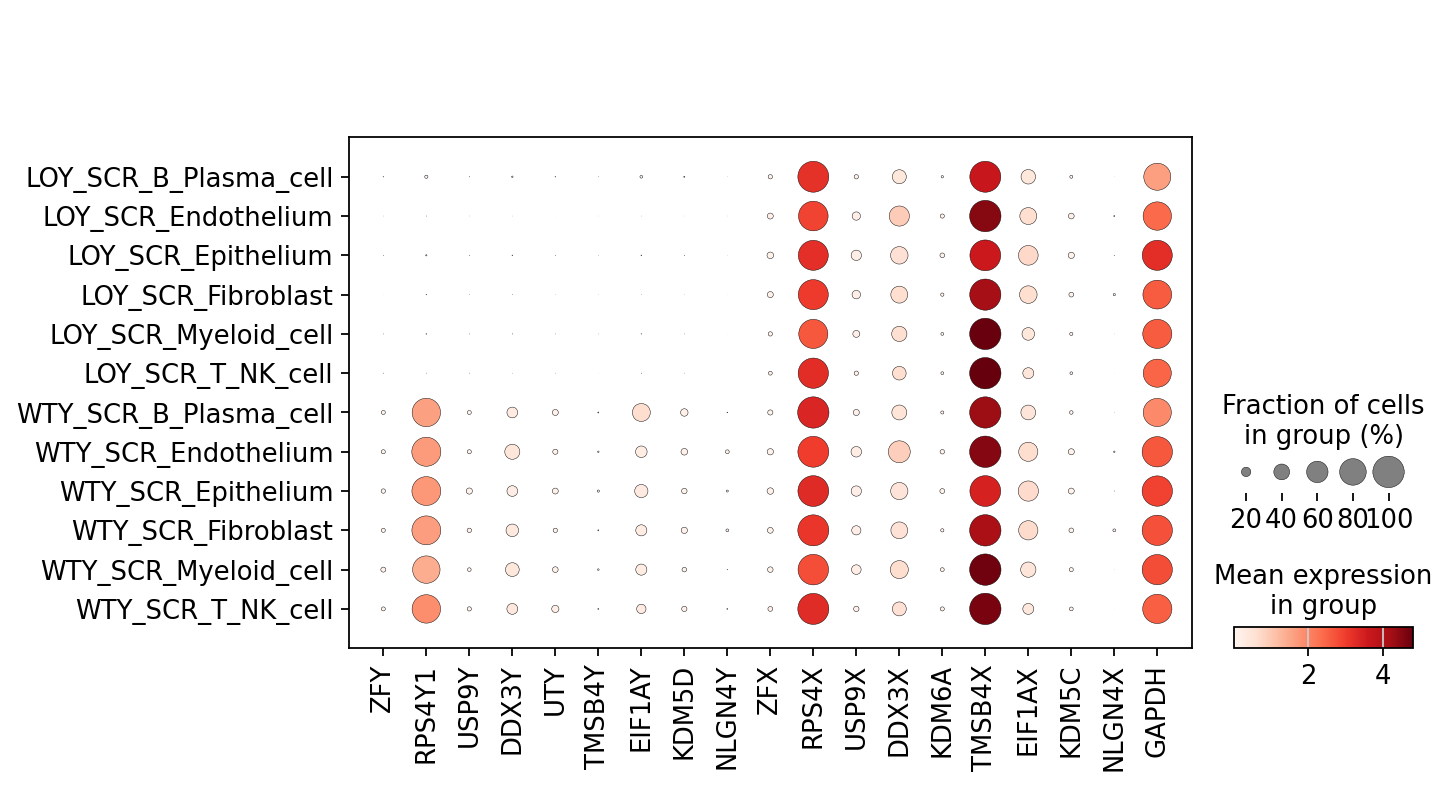

In [41]:
#Fig 3c
Paralog_XY = [
    'ZFY','RPS4Y1','USP9Y','DDX3Y','UTY','TMSB4Y','EIF1AY','KDM5D','NLGN4Y',
    'ZFX','RPS4X','USP9X','DDX3X','KDM6A','TMSB4X','EIF1AX','KDM5C','NLGN4X',
    'GAPDH'
]
sc.pl.dotplot(MALE, Paralog_XY, groupby='LOY_celltype1',
              save='Fig3c_9Ychr_genes&paralogs_LOY_celltype_Male.pdf')